## PyTorch Geometric

***Links***
* GraphSage unsupervised learning | Stellargraph - https://stellargraph.readthedocs.io/en/stable/demos/embeddings/graphsage-unsupervised-sampler-embeddings.html

In [2]:
from torch_geometric.datasets import Planetoid
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from torch_intermediate_layer_getter import IntermediateLayerGetter as MidGetter
import matplotlib.pyplot as plt

/home/vscode/.local/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = Planetoid(root='/tmp/Cora', name='Cora')

In [4]:
dataset[0]

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [5]:
data = dataset[0]

In [6]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from collections import OrderedDict 

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

In [7]:
print(GCN())

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

In [11]:
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.7990


In [12]:
model(data).shape

torch.Size([2708, 7])

In [13]:
out = model(data)

In [14]:
out.shape

torch.Size([2708, 7])

In [33]:
umap.UMAP().fit_transform(out.cpu().detach().numpy())

array([[15.754614 ,  2.8908882],
       [12.454316 , -4.8733487],
       [12.275779 , -4.437777 ],
       ...,
       [ 6.1240177,  1.6010782],
       [14.952741 ,  2.7898436],
       [13.729588 ,  2.9031615]], dtype=float32)

In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

transform = TSNE

In [17]:
trans = transform(n_components=2)
X_reduced = trans.fit_transform(out.cpu().detach().numpy())
X_reduced.shape

(2708, 2)

[None,
 Text(0.5, 0, '$X_1$'),
 Text(0, 0.5, '$X_2$'),
 Text(0.5, 1.0, 'TSNE visualization of GraphSAGE embeddings for cora dataset (supervised)')]

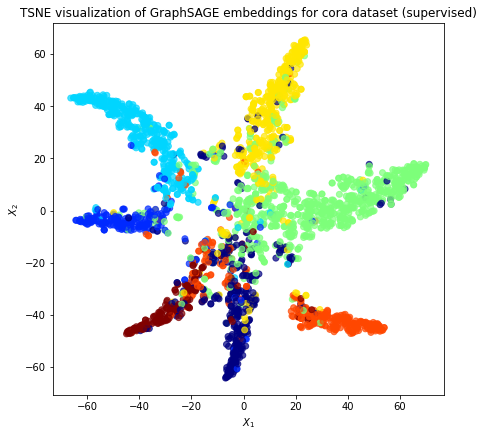

In [25]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=dataset[0].y,
    cmap="jet",
    alpha=0.7,
)
ax.set(
    aspect="equal",
    xlabel="$X_1$",
    ylabel="$X_2$",
    title=f"{transform.__name__} visualization of GraphSAGE embeddings for cora dataset (supervised)",
)

In [34]:
embd = umap.UMAP().fit_transform(out.cpu().detach().numpy())

In [35]:
embd.shape

(2708, 2)

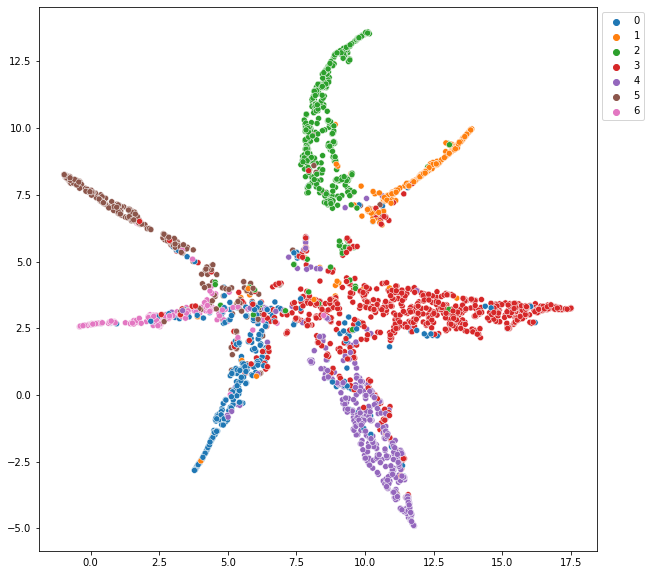

In [43]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=embd.T[0], y=embd.T[1], hue=data.y.cpu().numpy(), palette=palette)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.savefig("umap_embd_sage.png", dpi=120)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
palette = {}

for n, y in enumerate(set(data.y.numpy())):
    palette[y] = f'C{n}'

In [44]:
pip install torch_intermediate_layer_getter


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for torch-intermediate-layer-getter: filename=torch_intermediate_layer_getter-0.1.post1-py3-none-any.whl size=3724 sha256=2aab0dae190fd433f935abbd974d2396fb7271979d4540d8a8433fb5a6dc5376
  Stored in directory: /home/vscode/.cache/pip/wheels/54/06/4a/8872d359442f8045b3001aa9c92abe8a72512540bfa9ef62d8
Successfully built torch-intermediate-layer-getter
Note: you may need to restart the kernel to use updated packages.


In [50]:
return_layers = {
    'conv1': 'conv1',
    'conv2': 'conv2',
}

mid_getter = MidGetter(model, return_layers=return_layers, keep_output=True)
mid_outputs, model_output = mid_getter(data)

In [47]:
torch.randn(1, 2)

tensor([[-0.7967, -0.2068]])

In [51]:
model_output

tensor([[-9.5056e+00, -7.5289e+00, -8.9097e+00,  ..., -8.5087e+00,
         -1.0166e+01, -8.1592e+00],
        [-1.1641e+01, -1.5254e+01, -1.2202e+01,  ..., -3.6001e-05,
         -1.6875e+01, -1.2802e+01],
        [-9.8183e+00, -1.2753e+01, -1.0415e+01,  ..., -1.3806e-03,
         -1.4575e+01, -1.1044e+01],
        ...,
        [-5.6968e-01, -1.2361e+00, -6.1267e+00,  ..., -6.2456e+00,
         -2.7725e+00, -3.6266e+00],
        [-7.7086e+00, -5.5218e+00, -6.6818e+00,  ..., -5.7175e+00,
         -9.9995e+00, -9.0979e+00],
        [-7.1053e+00, -4.8232e+00, -5.9759e+00,  ..., -5.6373e+00,
         -8.8801e+00, -8.3027e+00]], grad_fn=<LogSoftmaxBackward0>)

In [63]:
mid_outputs['conv2']

tensor([[-2.8768, -0.9001, -2.2808,  ..., -1.8799, -3.5374, -1.5304],
        [-0.9532, -4.5666, -1.5143,  ..., 10.6876, -6.1873, -2.1140],
        [-1.3002, -4.2348, -1.8973,  ...,  8.5167, -6.0570, -2.5257],
        ...,
        [ 2.9070,  2.2406, -2.6500,  ..., -2.7689,  0.7042, -0.1499],
        [-2.4500, -0.2632, -1.4233,  ..., -0.4590, -4.7410, -3.8394],
        [-2.3314, -0.0493, -1.2020,  ..., -0.8634, -4.1062, -3.5288]],
       grad_fn=<AddBackward0>)

In [62]:
model_output

tensor([[-9.5056e+00, -7.5289e+00, -8.9097e+00,  ..., -8.5087e+00,
         -1.0166e+01, -8.1592e+00],
        [-1.1641e+01, -1.5254e+01, -1.2202e+01,  ..., -3.6001e-05,
         -1.6875e+01, -1.2802e+01],
        [-9.8183e+00, -1.2753e+01, -1.0415e+01,  ..., -1.3806e-03,
         -1.4575e+01, -1.1044e+01],
        ...,
        [-5.6968e-01, -1.2361e+00, -6.1267e+00,  ..., -6.2456e+00,
         -2.7725e+00, -3.6266e+00],
        [-7.7086e+00, -5.5218e+00, -6.6818e+00,  ..., -5.7175e+00,
         -9.9995e+00, -9.0979e+00],
        [-7.1053e+00, -4.8232e+00, -5.9759e+00,  ..., -5.6373e+00,
         -8.8801e+00, -8.3027e+00]], grad_fn=<LogSoftmaxBackward0>)

In [69]:
embd1 = umap.UMAP().fit_transform(mid_outputs['conv1'].cpu().detach().numpy())

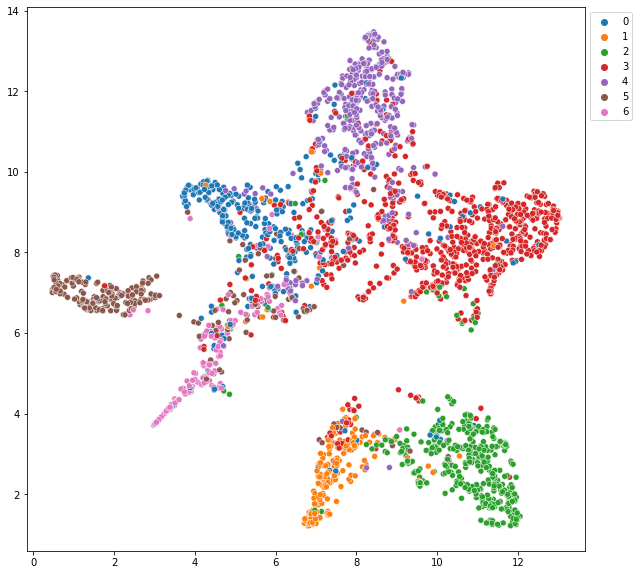

In [70]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=embd1.T[0], y=embd1.T[1], hue=data.y.cpu().numpy(), palette=palette)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

In [67]:
embd2 = umap.UMAP().fit_transform(mid_outputs['conv2'].cpu().detach().numpy())

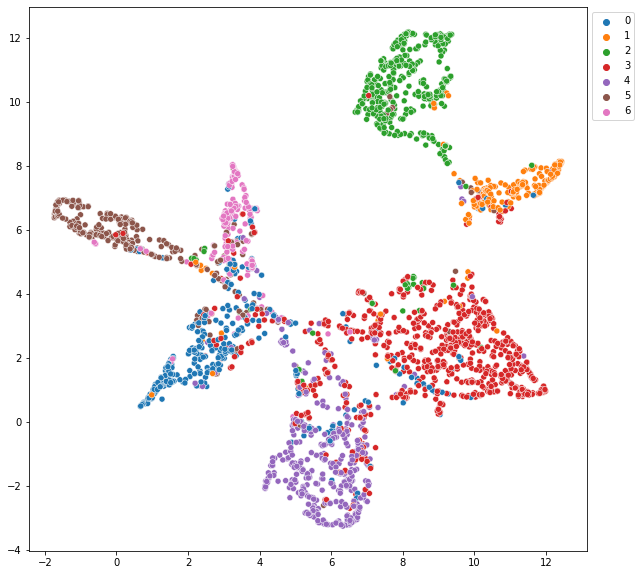

In [68]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=embd2.T[0], y=embd2.T[1], hue=data.y.cpu().numpy(), palette=palette)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

In [73]:
from torchsummary import summary


In [72]:
pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [100]:
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


In [91]:
data.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [107]:
summary(model, input_size=(2708,1433))

AttributeError: 'Tensor' object has no attribute 'x'

In [111]:
from torchvision import models
model = models.vgg16()


In [112]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [115]:
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 220, 224]           1,792
              ReLU-2         [-1, 64, 220, 224]               0
            Conv2d-3         [-1, 64, 220, 224]          36,928
              ReLU-4         [-1, 64, 220, 224]               0
         MaxPool2d-5         [-1, 64, 110, 112]               0
            Conv2d-6        [-1, 128, 110, 112]          73,856
              ReLU-7        [-1, 128, 110, 112]               0
            Conv2d-8        [-1, 128, 110, 112]         147,584
              ReLU-9        [-1, 128, 110, 112]               0
        MaxPool2d-10          [-1, 128, 55, 56]               0
           Conv2d-11          [-1, 256, 55, 56]         295,168
             ReLU-12          [-1, 256, 55, 56]               0
           Conv2d-13          [-1, 256, 55, 56]         590,080
             ReLU-14          [-1, 256,